# Bayesian estimation

Andrew Howes\
School of Computer Science\
University of Birmingham

As we have seen in the lectures, human users estimate the state of an interface, e.g. the location of target, using Bayesian estimation. 

This notebook gives one simple worked example of Bayesian estimation for a human estimating the visual location of a target from a sequence of fixations at a fixed location. 


Given a prior location distribution $z_1$ with uncertainty $\sigma^2_{z1}$, the user makes a visual observation $z_2$ with uncertainty  $\sigma^2_{z2}$. 

The user combines their prior and observation optimally using Bayesian estimation.

The best estimate, given the prior and observation, is $\mu$ with an associated error variance $ \sigma^2$ as defined below.  

$$ \mu =[\sigma^2_{z_2}/(\sigma^2_{z_1}+\sigma^2_{z_2})] z_1 +[\sigma^2_{z_1}/(\sigma^2_{z_1}+\sigma^2_{z_2})] z_2 $$


$$1/ \sigma^2=1/ \sigma^2_{z_1}+1/ \sigma^2_{z_2} $$

$\sigma$ is less than either $\sigma_{z_1}$ or $\sigma_{z_2}$ , which is to say that the uncertainty in the user's estimate of location has been decreased by combining the two pieces of information (the prior and the observation). 

If $\sigma_{z_1}$ were equal to $\sigma_{z_2}$, which is to say that the prior and observation are of equal precision, then the equation says the optimal estimate of position is simply the average of the two measurements, as would be expected. On the other hand, if $\sigma_{z_1}$ were larger than $\sigma_{z_2}$, which is to say that the uncertainty in the prior $z_1$ is greater than that of the observation $z_2$ , then the equation dictates “weighting” $z2$ more heavily than $z1$. Finally, the variance of the estimate is less than $\sigma_{z_1}$ , even if $\sigma_{z_2}$ is very large: even poor quality data provide some information, and should thus increase the precision of the user's estimate.

The above equations can be reformulated.

We have a Guassian prior $p(x)$, and a noisy observation $o$.

The optimal location estimate $\hat{X}$, that is the maximum of the posterior is:

$$\hat{X}=\alpha o +(1- \alpha) \hat{\mu}$$

Where,

$$\alpha=\dfrac{\sigma^2_{p}}{\sigma^2_{p}+\sigma^2_{o}}$$


In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib as mpl

import scipy.stats
import numpy as np

mpl.style.use('fivethirtyeight')


def combine_two_guassian(m1,sigma1,m2,sigma2):
    '''
    Optimally combine two gaussians
    Return combine mean and std
    '''
    w1=sigma2**2/(sigma1**2+sigma2**2)
    w2=sigma1**2/(sigma1**2+sigma2**2)

    m=w1*m1+w2*m2
    sigma=np.sqrt( (sigma1**2 * sigma2**2)/(sigma1**2 + sigma2**2))

    return m,sigma

def plot_gaussian(mean,sigma,fmt,label):
    '''
    plot the guassian pdf
    '''
    x_min = mean-3*sigma
    x_max = mean+3*sigma
    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean,sigma)
    plt.xlim(-1,80)
    plt.ylim(0,0.06)
    plt.plot(x,y,fmt,label=label)


Text(0.5, 0, 'Eccentricity')

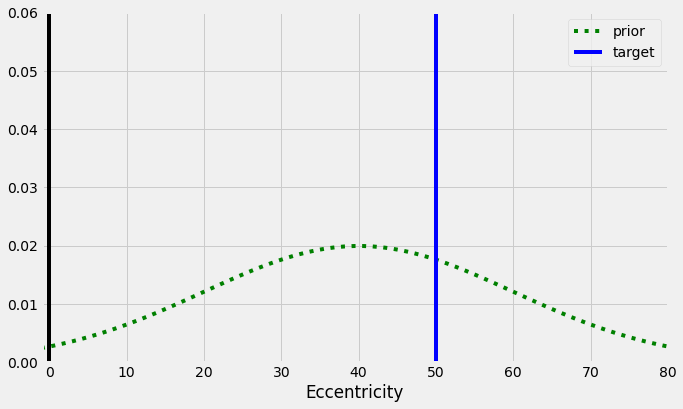

In [2]:
fixation=0
target=50
m1,sigma1=40,20
m2,sigma2=47,10

plt.figure(figsize=(10,6))
# obs 1

plot_gaussian(m1,sigma1,'g:','prior')

# plot the target line and fixation line
plt.axvline(x = target, color = 'b', label = 'target')
plt.axvline(x = fixation, color = 'k')

plt.legend(loc='best')
plt.xlabel('Eccentricity')


Text(0.5, 0, 'Eccentricity')

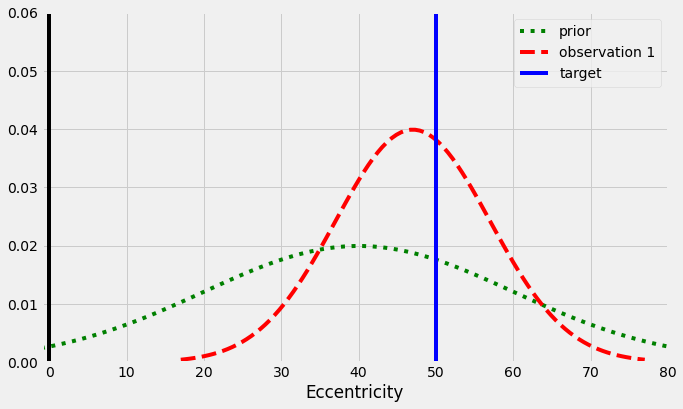

In [3]:


plt.figure(figsize=(10,6))
# obs 1

plot_gaussian(m1,sigma1,'g:','prior')

# obs 2

plot_gaussian(m2,sigma2,'r--','observation 1')


# plot the target line and fixation line
plt.axvline(x = target, color = 'b', label = 'target')
plt.axvline(x = fixation, color = 'k')

plt.legend(loc='best')
plt.xlabel('Eccentricity')



45.6
8.94427190999916


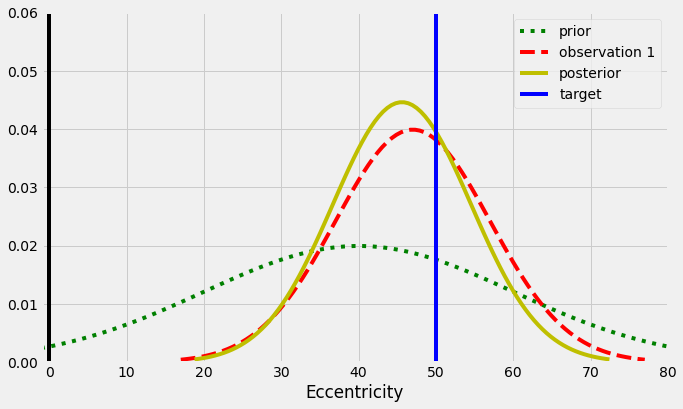

In [5]:
fixation=0
target=50

plt.figure(figsize=(10,6))
# obs 1

plot_gaussian(m1,sigma1,'g:','prior')

# obs 2

plot_gaussian(m2,sigma2,'r--','observation 1')

# combine obs1 and obs2
m3,sigma3=combine_two_guassian(m1,sigma1,m2,sigma2)
plot_gaussian(m3,sigma3,'y-','posterior')

# plot the target line and fixation line
plt.axvline(x = target, color = 'b', label = 'target')
plt.axvline(x = fixation, color = 'k')

plt.legend(loc='best')
plt.xlabel('Eccentricity')

print(m3)
print(sigma3)


## Exercises

1. Try different values of the mean and variance of the distributions. Satisfy yourself that the posterior estimate is always more accurate than the prior and the observation.

2. Given a prior with standard deviation of 20 and mean 40, imagine three observations each with different standard deviation (5,10,15) but the same location (70). Illustrate the effect of each observation on the posterior.

Advanced

3. Write a function that takes as input a sequences of observations of arbitrary length and generates a posterior estimate of the target location. This will be your first simple model of human vision.
